**Idea:** create an array prefix where prefix[i] is the sum of all elements up to the index i (inclusive).  
**Goal:** Prefix sums allow us to find the sum of any subarray in O(1). Basically that is the (sum of [i] - sum of [i - j])  
**Out of Bounds Prevension:** `prefix[j] - prefix[i] + nums[i]`

**Sum of the subarray from 0 to i:** `prefix[i]`  
**Sum of the subarray from i to j:** `prefix[j] - prefix[i - 1]`  
**Sum of the subarray from i to j (involves 0 index):** `prefix[j] - prefix[i] + sum[i]`

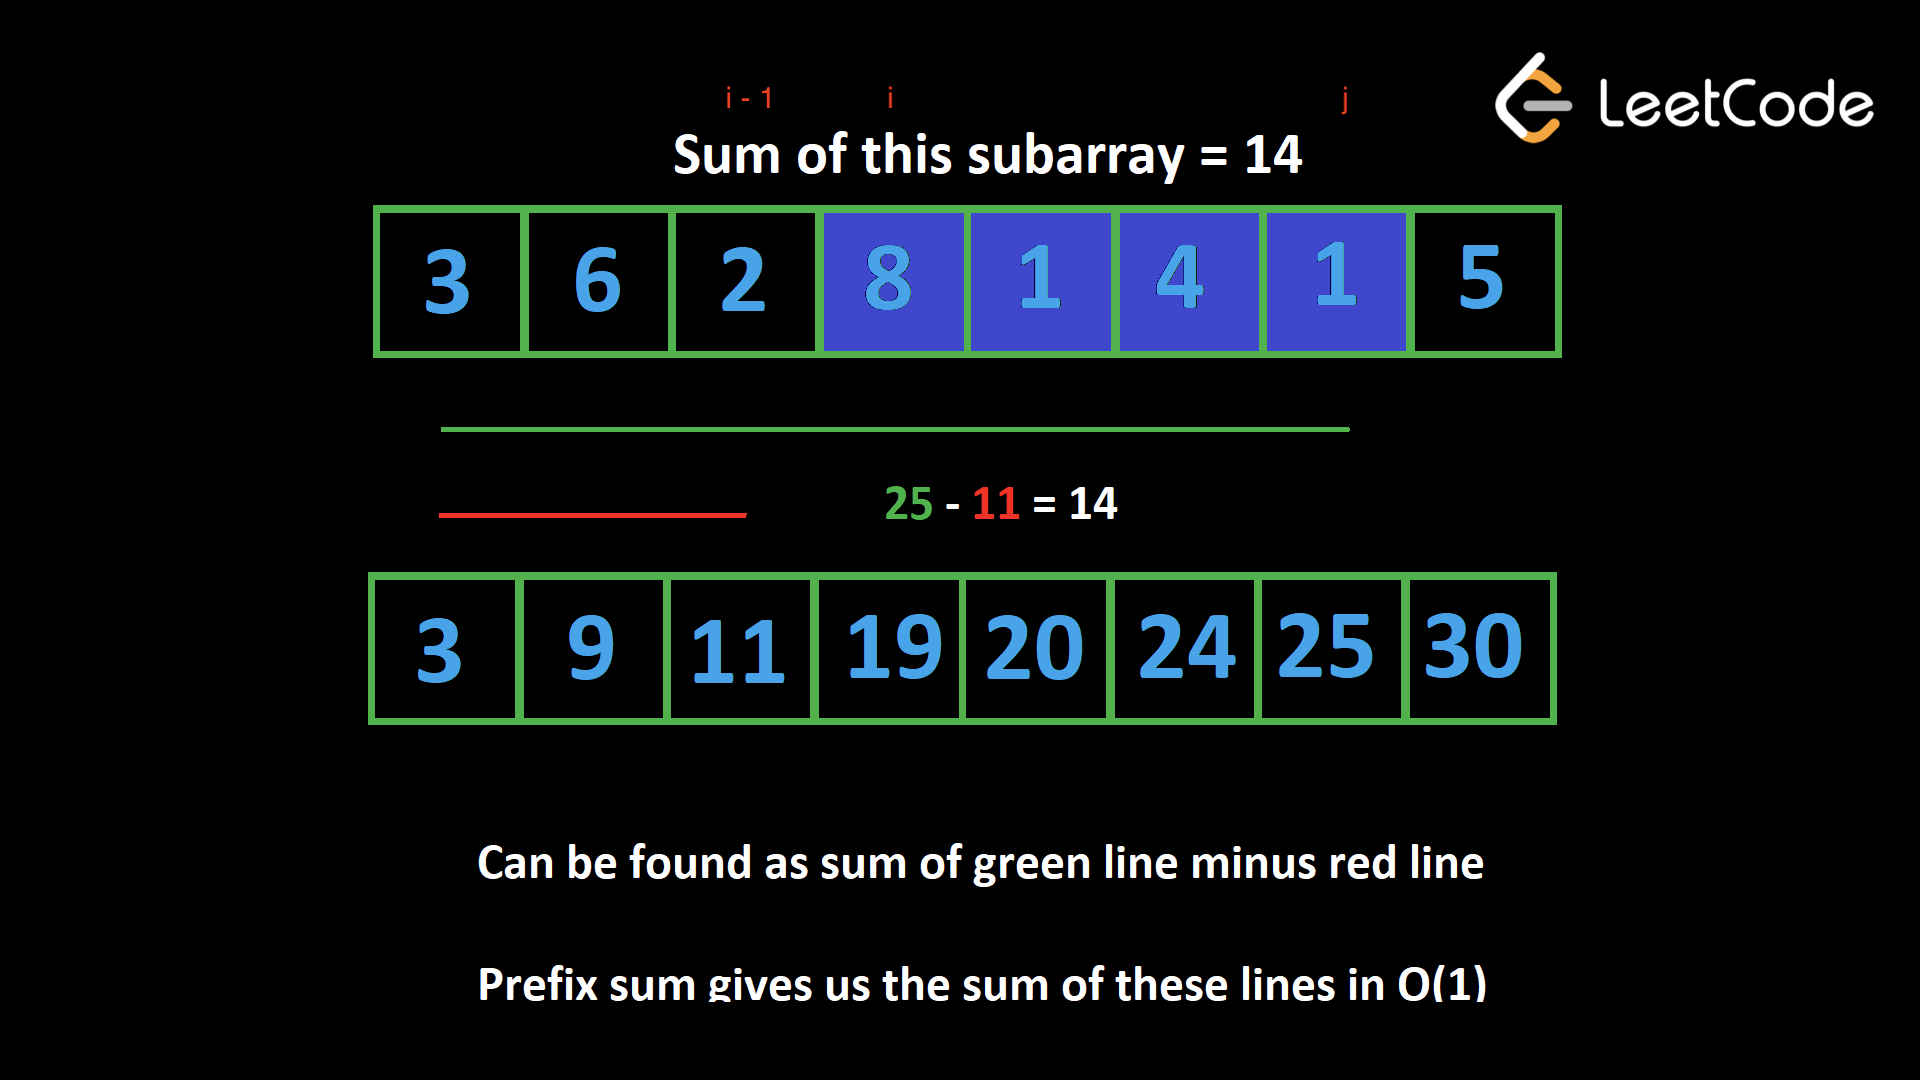

#### When to Use this Algorithm?

Suppose you're walking along a path, and someone asks how far you are from a point you passed earlier. Instead of counting the steps back, you just subtract the distance from where you are now to the point in question. This is what the prefix sum does. By using it, we can answer multiple queries in constant time, which reduces the computation time from a multiplication factor of q to just addition for each query.

To generalize, when a problem requires answering multiple queries, and each query involves some form of range aggregation where each aggregate builds on the previous one, the prefix sum is often a good fit, such as the sum of a subarray, the product of a range, counting from a range or finding averages.


In [ ]:
prefix = [nums[0]]
for (int i = 1; i < nums.length; i++)
    prefix.append(nums[i] + prefix[prefix.length - 1])

Example 1: Given an integer array nums, an array queries where queries[i] = [x, y] and an integer limit, return a boolean array that represents the answer to each query. A query is true if the sum of the subarray from x to y is less than limit, or false otherwise.

For example, given nums = [1, 6, 3, 2, 7, 2], queries = [[0, 3], [2, 5], [2, 4]], and limit = 13, the answer is [true, false, true]. For each query, the subarray sums are [12, 14, 12].

In [ ]:
vector<bool> answerQueries(vector<int>& nums, vector<vector<int>>& queries, int limit) {
    vector<int> prefix;
    prefix.push_back(nums[0]);

    for (int i = 1; i < nums.size(); i++) {
        prefix.push_back(nums[i] + prefix[prefix.size() - 1]);
    }

    vector<bool> result;
    for (auto entries : queries) {
        int x = entries[0];
        int y = entries[1];
        int curr = prefix[y] - prefix[x] + nums[x];
        if (curr < limit) {
            result.push_back(true);
        } else {
            result.push_back(false);
        }
    }
    return result;
}

**Complexity:**  
- Without the prefix sum, each query would take up to O(n), and with the total query length, that would be O(n * m)
- With the prefix sum, each query would take O(1), and with the total query length, that would just be O(m). Additionally with the build up of prefix sum, that would be O(n + m).

In [ ]:
def answer_queries(nums, queries, limit):
    prefix_sum = [nums[0]]
    for i in range (1, len(nums)):
        prefix_sum.append(nums[i] + prefix_sum[-1])

    result = []
    for x, y in range (len(queries)):
        # x = queries[i][0]
        # y = queries[i][i]
        curr = prefix_sum[y] - prefix_sum[x] + nums[x]
        result.append(curr < limit)
    return result